<a href="https://colab.research.google.com/github/rishi-29-02/horse_human_flask_colab_global_Heroku_deployment/blob/main/Horses_Humans_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horse or Human Convnet Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-05-28 04:26:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  93.6MB/s    in 1.5s    

2021-05-28 04:26:22 (93.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-05-28 04:26:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

Link to the datasets

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

Unzipping the data

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Defining the directories

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
valid_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

['horse31-0.png', 'horse34-3.png', 'horse08-9.png', 'horse25-2.png', 'horse07-2.png', 'horse45-9.png', 'horse38-3.png', 'horse33-1.png', 'horse10-2.png', 'horse15-2.png']


In [ ]:
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['human02-06.png', 'human07-23.png', 'human08-29.png', 'human03-05.png', 'human14-05.png', 'human13-21.png', 'human05-09.png', 'human16-23.png', 'human15-05.png', 'human03-25.png']


In [ ]:
valid_horse_names = os.listdir(valid_horse_dir)
print(valid_horse_names[:10])
valid_human_names = os.listdir(valid_human_dir)
print(valid_human_names[:10])

['horse5-076.png', 'horse1-411.png', 'horse4-530.png', 'horse4-102.png', 'horse2-218.png', 'horse6-403.png', 'horse4-556.png', 'horse5-002.png', 'horse5-032.png', 'horse5-550.png']
['valhuman04-08.png', 'valhuman03-10.png', 'valhuman05-18.png', 'valhuman05-08.png', 'valhuman01-00.png', 'valhuman04-10.png', 'valhuman04-18.png', 'valhuman04-02.png', 'valhuman04-17.png', 'valhuman01-20.png']


In [ ]:
print('The total number of horse images for training : ', len(os.listdir(train_horse_dir)))
print('The total number of human images for training : ', len(os.listdir(train_human_dir)))
print('The total number of horse images for validation : ', len(os.listdir(valid_horse_dir)))
print('The total number of human images for validation : ', len(os.listdir(valid_human_dir)))

The total number of horse images for training :  500
The total number of human images for training :  527
The total number of horse images for validation :  128
The total number of human images for validation :  128


In [ ]:
categories = os.listdir('/tmp/horse-or-human')
categories

['horses', 'humans']

In [ ]:
train_path = '/tmp/horse-or-human'
train_images = []
for category in categories:
  folder = train_path + '/' + category
  train_images.append(len(os.listdir(folder)))

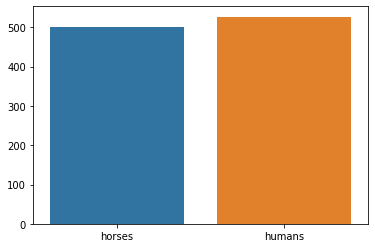

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=categories, y=train_images)
plt.show()

Plot some images

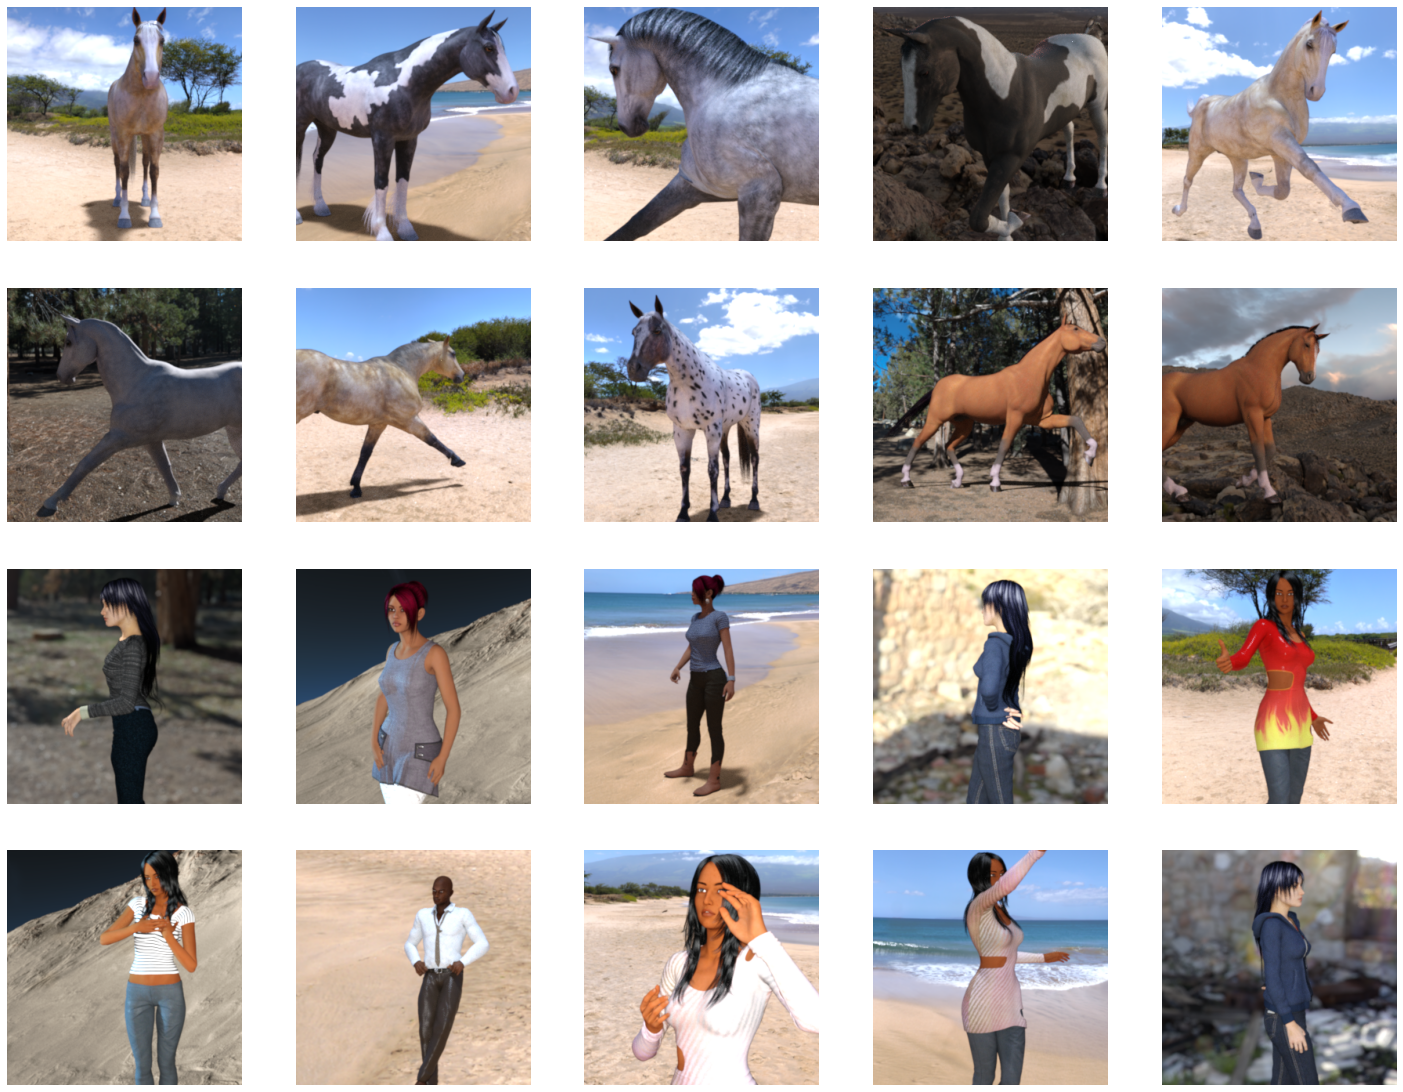

In [ ]:
import matplotlib.image as mpimg

# plotting the images od shape 5x5
n_rows = 5
n_columns = 5

# idx for iterating over the images
pic_ind = 0

fig = plt.gcf() # get current figure (if no current figure exists then a new one is created using figure())
fig.set_size_inches(n_columns*5, n_rows*5)

# get the path for the figures
next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_ind:pic_ind+10]]
next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_ind:pic_ind+10]]

for i, img_path in enumerate(next_horse_pic+next_human_pic):
  plt.subplot(n_rows, n_columns, i+1)
  plt.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building the model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([# First Convolution layer
                             tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Second Convolution layer
                             tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Third Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Fourth Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Fifth Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Flatten and feed into DNN
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation=tf.nn.relu),
                             tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1/255)
validation_datagen = ImageDataGenerator(1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human',
                                                    target_size=(300, 300),
                                                    batch_size=128,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human',
                                                              target_size=(300, 300),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
8/8 [==============================] - 42s 915ms/step - loss: 120.9403 - accuracy: 0.4939 - val_loss: 1.1992 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 916ms/step - loss: 1.1251 - accuracy: 0.5740 - val_loss: 1.5359 - val_accuracy: 0.5430
Epoch 3/15
8/8 [==============================] - 7s 893ms/step - loss: 1.1675 - accuracy: 0.5884 - val_loss: 0.8787 - val_accuracy: 0.5664
Epoch 4/15
8/8 [==============================] - 7s 1s/step - loss: 0.4303 - accuracy: 0.8420 - val_loss: 2.0770 - val_accuracy: 0.5078
Epoch 5/15
8/8 [==============================] - 7s 897ms/step - loss: 1.1934 - accuracy: 0.6719 - val_loss: 0.3723 - val_accuracy: 0.8477
Epoch 6/15
8/8 [==============================] - 7s 895ms/step - loss: 0.8084 - accuracy: 0.7319 - val_loss: 1.9191 - val_accuracy: 0.5977
Epoch 7/15
8/8 [==============================] - 7s 896ms/step - loss: 1.6785 - accuracy: 0.6352 - val_loss: 0.6576 - val_accuracy: 0.8633
Epoch 8/15
8/8 [====

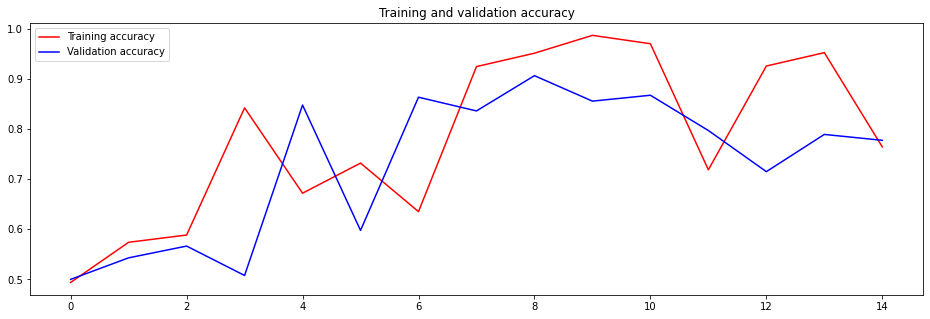

<Figure size 432x288 with 0 Axes>

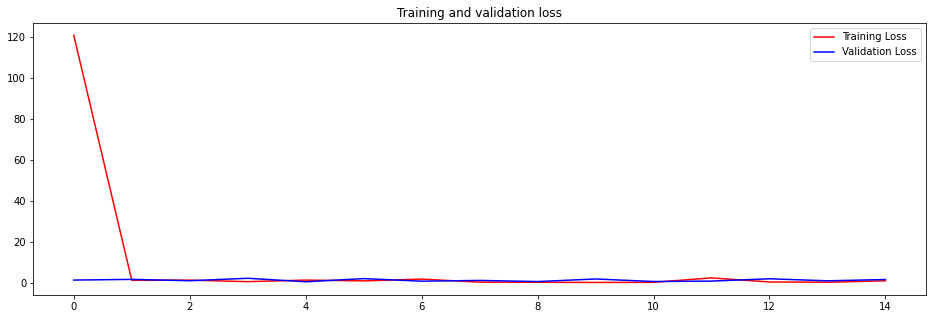

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16, 5))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.figure(figsize=(16, 5))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Visulaizing the intermideiate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


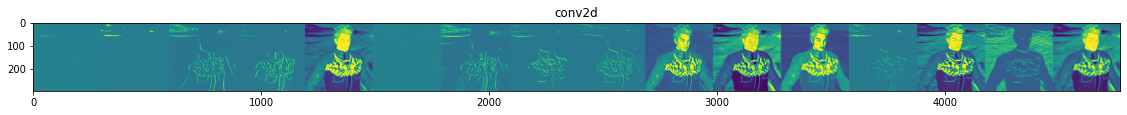

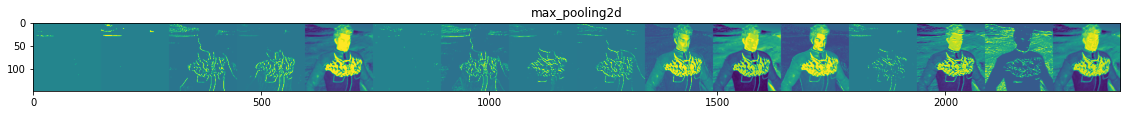

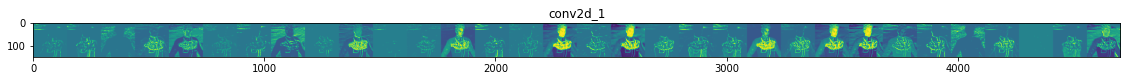

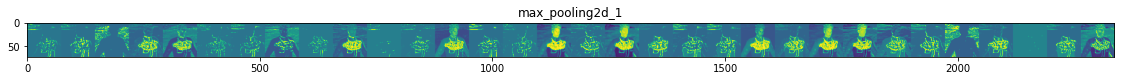

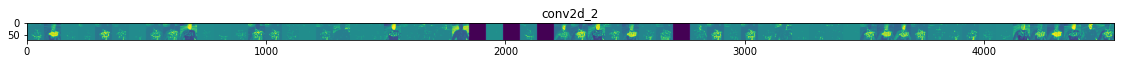

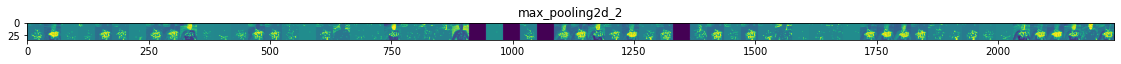

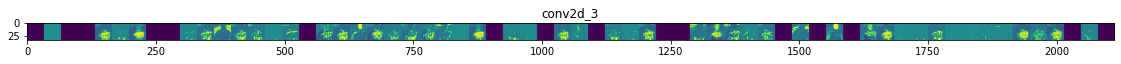

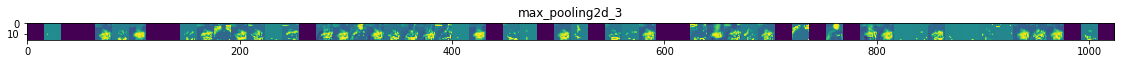

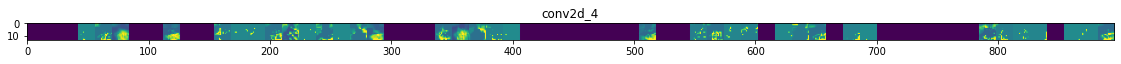

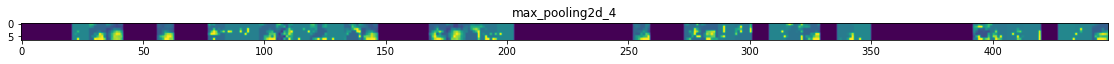

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image

layers_outputs = [layer.output for layer in model.layers]
visulaization_model = tf.keras.models.Model(inputs=model.inputs, outputs=layers_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img) # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 300, 300, 3)

# Rescale
x = x/255

successive_feature_maps = visulaization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))
    
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x = x -x.mean()
      x = x/x.std()
      x = x*64 + 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size : (i+1)*size] = x

    scale = 20. / n_features 
    plt.figure(figsize=(scale*n_features, scale))
    plt.grid(False)
    plt.title(layer_name)
    plt.imshow(display_grid)

## Running the model

Saving pic.jpg to pic.jpg


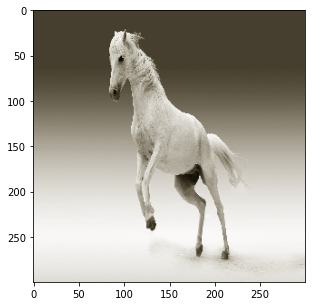

[[0.00423968]]
pic.jpg is a horse


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn 
  img = image.load_img(path, target_size=(300, 300))
  plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')

Saving the model

In [ ]:
#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#from keras.models import load_model 

#mod = load_model('my_model.h5')

In [ ]:
'''
import numpy as np
from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn 
  img = image.load_img(path, target_size=(300, 300))
  plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = mod.predict(images, batch_size=10)
  print(classes)
  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')
'''